<a href="https://colab.research.google.com/github/HopmanWorld/Timeseries-prediction/blob/main/ETH_Price_Prediction_with_fbProphet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# install fbProphet
!pip install prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# 1 - extract crypto prices: yfinance
# 2 - fbProphet, matplotlib, pandas


In [2]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.0 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [7]:
from prophet import Prophet
import pandas as pd, matplotlib as plt, yfinance as yf


In [8]:
df = yf.download('ETH-USD')

[*********************100%***********************]  1 of 1 completed


In [24]:
df


,level_0,index,Date,ds,h,l,y,x1,x2
0,0,0,2017-11-09,308.644989,329.451996,307.056000,320.884003,320.884003,893249984
1,1,1,2017-11-10,320.670990,324.717987,294.541992,299.252991,299.252991,885985984
2,2,2,2017-11-11,298.585999,319.453003,298.191986,314.681000,314.681000,842300992
3,3,3,2017-11-12,314.690002,319.153015,298.513000,307.907990,307.907990,1613479936
4,4,4,2017-11-13,307.024994,328.415009,307.024994,316.716003,316.716003,1041889984
...,...,...,...,...,...,...,...,...,...
1730,1730,1730,2022-08-05,1607.523926,1732.254639,1606.497070,1732.254639,1732.254639,18546491876
1731,1731,1731,2022-08-06,1732.661133,1744.326416,1691.658081,1691.658081,1691.658081,11757911705
1732,1732,1732,2022-08-07,1691.777954,1724.789185,1672.908447,1699.350830,1699.350830,10252090340
1733,1733,1733,2022-08-08,1699.693481,1806.886475,1697.407959,1775.516113,1775.516113,16841424404


In [25]:
df.tail()

,level_0,index,Date,ds,h,l,y,x1,x2
1730,1730,1730,2022-08-05,1607.523926,1732.254639,1606.497070,1732.254639,1732.254639,18546491876
1731,1731,1731,2022-08-06,1732.661133,1744.326416,1691.658081,1691.658081,1691.658081,11757911705
1732,1732,1732,2022-08-07,1691.777954,1724.789185,1672.908447,1699.350830,1699.350830,10252090340
1733,1733,1733,2022-08-08,1699.693481,1806.886475,1697.407959,1775.516113,1775.516113,16841424404
1734,1734,1734,2022-08-09,1776.006348,1782.111816,1765.764771,1779.216187,1779.216187,18007420928


In [26]:
model = Prophet()

In [27]:
model.fit(df)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp960ynwm1/fisjveul.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp960ynwm1/_jidc6e5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=86176', 'data', 'file=/tmp/tmp960ynwm1/fisjveul.json', 'init=/tmp/tmp960ynwm1/_jidc6e5.json', 'output', 'file=/tmp/tmp2_rmwla6/prophet_model-20220809052018.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:20:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:20:18 - cmdstanpy - INFO - Chain [1] done processing
IN

In [28]:
# getting future prediction
future_dates = model.make_future_dataframe(periods = 60)

In [29]:
future_dates.tail()

,ds
1789,1970-02-26 00:00:00.000004810
1790,1970-02-27 00:00:00.000004810
1791,1970-02-28 00:00:00.000004810
1792,1970-03-01 00:00:00.000004810
1793,1970-03-02 00:00:00.000004810


In [31]:
prediction = model.predict(df)

In [32]:
prediction.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1730,1970-01-01 00:00:00.000004648,4616.113225,4517.605396,4724.368430,4616.113225,4616.113225,0.0,0.0,0.0,0.0,0.0,0.0,4616.113225
1731,1970-01-01 00:00:00.000004666,4633.772309,4527.917428,4728.885730,4633.772309,4633.772309,0.0,0.0,0.0,0.0,0.0,0.0,4633.772309
1732,1970-01-01 00:00:00.000004724,4690.673802,4591.369412,4793.937750,4690.673802,4690.673802,0.0,0.0,0.0,0.0,0.0,0.0,4690.673802
1733,1970-01-01 00:00:00.000004733,4699.503344,4594.544846,4802.288406,4699.503344,4699.503344,0.0,0.0,0.0,0.0,0.0,0.0,4699.503344
1734,1970-01-01 00:00:00.000004810,4775.044980,4677.587669,4876.029547,4775.044980,4775.044980,0.0,0.0,0.0,0.0,0.0,0.0,4775.044980


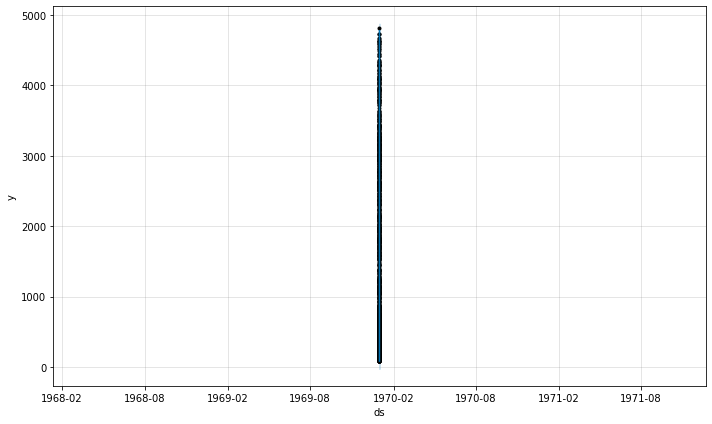

In [33]:
fig = model.plot(prediction)

In [36]:
from prophet.plot import plot_plotly
plot_plotly(model, prediction)

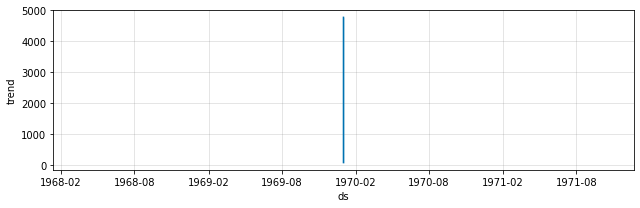

In [37]:
fig2 = model.plot_components(prediction)  